In [1]:
# Importing dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Importing CSV
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,3,3,4,1,3,2,4,3,0,0.0
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,4,4,4,5,5,4,4,0,3.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,4,4,3,3,4,3,5,4,0,0.0
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,4,4,4,3,4,2,0,0.0


In [3]:
# Filtering dataframe for Loyal Customer
data = df[(df["Class"]=="Eco Plus")&(df["Customer Type"]=="Loyal Customer") ]
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
5,dissatisfied,Female,Loyal Customer,54,Personal Travel,Eco Plus,50,3,5,3,...,4,1,1,3,1,1,1,5,0,0.0
24,dissatisfied,Female,Loyal Customer,44,Personal Travel,Eco Plus,51,4,5,4,...,2,2,2,4,2,4,2,3,40,45.0
40,satisfied,Female,Loyal Customer,56,Personal Travel,Eco Plus,52,4,4,4,...,5,3,3,4,5,4,3,4,0,0.0
43,satisfied,Female,Loyal Customer,51,Personal Travel,Eco Plus,52,4,4,4,...,4,4,4,5,4,5,4,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119544,dissatisfied,Female,Loyal Customer,58,Personal Travel,Eco Plus,5945,3,2,3,...,5,3,1,3,3,5,2,5,60,54.0
119566,dissatisfied,Female,Loyal Customer,42,Business travel,Eco Plus,6324,2,2,2,...,2,2,4,1,3,2,3,2,17,14.0
119584,satisfied,Male,Loyal Customer,67,Personal Travel,Eco Plus,6598,5,5,5,...,1,1,3,5,5,1,3,1,0,0.0
119591,satisfied,Male,Loyal Customer,38,Business travel,Eco Plus,6733,4,4,4,...,4,3,4,3,5,4,5,4,2,0.0


In [4]:
# Creating new dataframe from the filtered dataframe and dropping all demographic data
newdf = data.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance" ], axis=1)
feature_names = newdf.columns
newdf.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,4,4,4,2,5,4,5,5,3,4,3,4,4,5,0,0.0
5,3,5,3,3,2,4,4,1,1,3,1,1,1,5,0,0.0
24,4,5,4,3,3,2,2,2,2,4,2,4,2,3,40,45.0
40,4,4,4,4,2,5,5,3,3,4,5,4,3,4,0,0.0
43,4,4,4,4,2,4,4,4,4,5,4,5,4,3,1,0.0


In [5]:
# Assigning target (y variable)
target = data["satisfaction"]
target_names = ["satisfied", "dissatisfied"]

In [6]:
# Checking nulls
newdf.isnull().sum()

Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             24
dtype: int64

In [7]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf, target, random_state=42)

In [8]:
# Importing imputer and training the dataset for nan values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [9]:
X_test = imputer.transform(X_test)

In [10]:
feature_names
lst = list(feature_names)
lst

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [11]:
# Importing Logistic Regression module
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=4000000)
classifier

LogisticRegression(max_iter=4000000)

In [12]:
# Training the dataset
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=4000000)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8380046713380047
Testing Data Score: 0.8343343343343343


In [14]:
# Testing the model
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
18406,satisfied,satisfied
60901,dissatisfied,dissatisfied
45113,satisfied,satisfied
53724,satisfied,satisfied
89603,dissatisfied,dissatisfied
...,...,...
40498,dissatisfied,dissatisfied
32320,satisfied,satisfied
48882,satisfied,satisfied
98155,dissatisfied,dissatisfied


In [15]:
# Checking feature importance
import eli5
eli5.show_weights(classifier, feature_names=lst)

Weight?,Feature
+0.831,Inflight entertainment
+0.717,Seat comfort
+0.609,Ease of Online booking
+0.341,On-board service
+0.257,Checkin service
+0.253,Gate location
+0.192,Online support
+0.162,Leg room service
+0.028,Food and drink
+0.001,Departure Delay in Minutes


<AxesSubplot:>

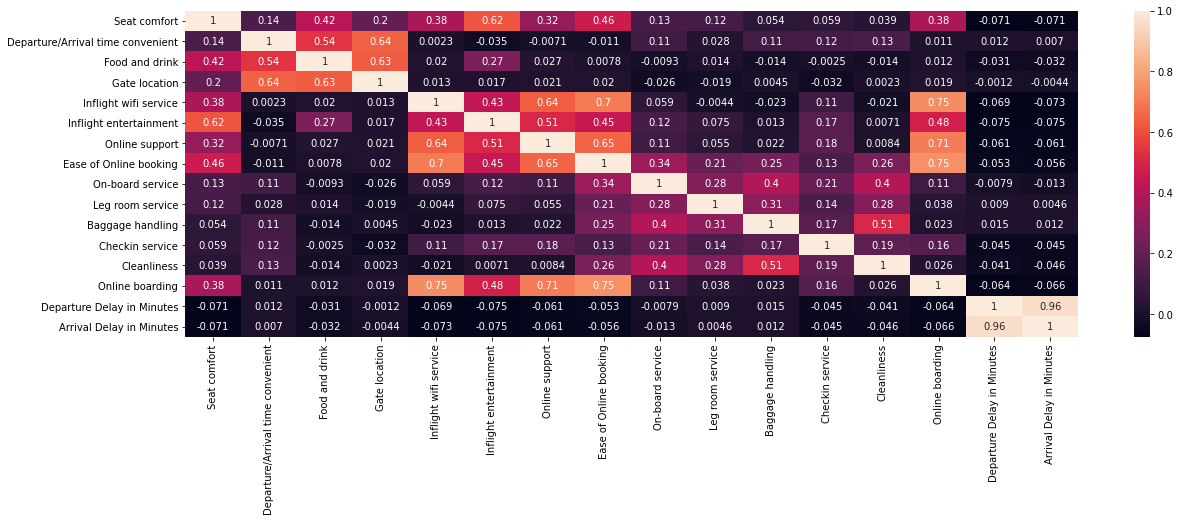

In [16]:
# Checking coorelation between variables
import seaborn as sns
cor = newdf.corr()
plt.figure(figsize = (20,6))
sns.heatmap(cor, annot=True)

In [17]:
# Creating a copy of the original dataset
improved = data.copy()
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
5,dissatisfied,Female,Loyal Customer,54,Personal Travel,Eco Plus,50,3,5,3,...,4,1,1,3,1,1,1,5,0,0.0
24,dissatisfied,Female,Loyal Customer,44,Personal Travel,Eco Plus,51,4,5,4,...,2,2,2,4,2,4,2,3,40,45.0
40,satisfied,Female,Loyal Customer,56,Personal Travel,Eco Plus,52,4,4,4,...,5,3,3,4,5,4,3,4,0,0.0
43,satisfied,Female,Loyal Customer,51,Personal Travel,Eco Plus,52,4,4,4,...,4,4,4,5,4,5,4,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119544,dissatisfied,Female,Loyal Customer,58,Personal Travel,Eco Plus,5945,3,2,3,...,5,3,1,3,3,5,2,5,60,54.0
119566,dissatisfied,Female,Loyal Customer,42,Business travel,Eco Plus,6324,2,2,2,...,2,2,4,1,3,2,3,2,17,14.0
119584,satisfied,Male,Loyal Customer,67,Personal Travel,Eco Plus,6598,5,5,5,...,1,1,3,5,5,1,3,1,0,0.0
119591,satisfied,Male,Loyal Customer,38,Business travel,Eco Plus,6733,4,4,4,...,4,3,4,3,5,4,5,4,2,0.0


In [18]:
# Improving the scores for the top 3 variables
improved['Inflight entertainment improved'] = np.where((improved['Inflight entertainment'] <= 3),  improved['Inflight entertainment']+1, improved['Inflight entertainment'])
improved['Seat comfort improved'] = np.where((improved['Seat comfort'] <= 3),  improved['Seat comfort']+1, improved['Seat comfort'])
improved['Ease of Online booking improved'] = np.where((improved['Ease of Online booking'] <= 3),  improved['Ease of Online booking']+1, improved['Ease of Online booking'])


In [19]:
#improved.to_csv("test.csv")
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment improved,Seat comfort improved,Ease of Online booking improved
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,4,3,4,4,5,0,0.0,4,4,5
5,dissatisfied,Female,Loyal Customer,54,Personal Travel,Eco Plus,50,3,5,3,...,3,1,1,1,5,0,0.0,4,4,2
24,dissatisfied,Female,Loyal Customer,44,Personal Travel,Eco Plus,51,4,5,4,...,4,2,4,2,3,40,45.0,3,4,3
40,satisfied,Female,Loyal Customer,56,Personal Travel,Eco Plus,52,4,4,4,...,4,5,4,3,4,0,0.0,5,4,4
43,satisfied,Female,Loyal Customer,51,Personal Travel,Eco Plus,52,4,4,4,...,5,4,5,4,3,1,0.0,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119544,dissatisfied,Female,Loyal Customer,58,Personal Travel,Eco Plus,5945,3,2,3,...,3,3,5,2,5,60,54.0,2,4,4
119566,dissatisfied,Female,Loyal Customer,42,Business travel,Eco Plus,6324,2,2,2,...,1,3,2,3,2,17,14.0,3,3,3
119584,satisfied,Male,Loyal Customer,67,Personal Travel,Eco Plus,6598,5,5,5,...,5,5,1,3,1,0,0.0,2,5,2
119591,satisfied,Male,Loyal Customer,38,Business travel,Eco Plus,6733,4,4,4,...,3,5,4,5,4,2,0.0,4,4,4


In [20]:
# Assigning the dependent variable
y_improved = improved["satisfaction"]

In [21]:
# Removing all demographic data and assigning to X variable
X_improved = improved.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance", "Inflight entertainment","Seat comfort", "Ease of Online booking" ], axis=1)

X_improved.head()

,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment improved,Seat comfort improved,Ease of Online booking improved
1,4,4,2,5,5,3,4,3,4,4,5,0,0.0,4,4,5
5,5,3,3,2,4,1,3,1,1,1,5,0,0.0,4,4,2
24,5,4,3,3,2,2,4,2,4,2,3,40,45.0,3,4,3
40,4,4,4,2,5,3,4,5,4,3,4,0,0.0,5,4,4
43,4,4,4,2,4,4,5,4,5,4,3,1,0.0,4,4,4


In [22]:
X_improved = imputer.transform(X_improved)

In [23]:
# Running the model on the improved scores
predictions = classifier.predict(X_improved)
predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_improved})
predictions

,Prediction,Actual
1,dissatisfied,satisfied
5,dissatisfied,dissatisfied
24,satisfied,dissatisfied
40,dissatisfied,satisfied
43,satisfied,satisfied
...,...,...
119544,satisfied,dissatisfied
119566,satisfied,dissatisfied
119584,satisfied,satisfied
119591,satisfied,satisfied


In [24]:
# Saving the predictions as CSV
predictions.to_csv("loyal_ecoplus_improved_ratings.csv")